In [27]:
from typing import Literal
from pydantic import BaseModel
from sphinx.util.docutils import CustomReSTDispatcher

In [28]:
class PortfolioState(BaseModel):
    amt_usd: float
    total_usd : float=0
    target_currency : Literal["INR","EUR"]
    total : float=0


In [29]:
def calc_total_usd(state:PortfolioState)->PortfolioState:
    state.total_usd = state.amt_usd*1.08
    return state
def calc_inr(state:PortfolioState)->PortfolioState:
    state.total = state.amt_usd*85
    return state
def calc_eur(state:PortfolioState)->PortfolioState:
    state.total = state.amt_usd*0.98
    return state
def choose_conversion(state:PortfolioState)-> str:
    return state.target_currency


In [30]:
from langgraph.graph import StateGraph,START,END
builder = StateGraph(PortfolioState)
builder.add_node("calc_total_usd",calc_total_usd)
builder.add_node("calc_inr",calc_inr)
builder.add_node("calc_eur",calc_eur)
builder.add_edge(START,'calc_total_usd')
builder.add_conditional_edges('calc_total_usd',
        choose_conversion,{
            "INR": "calc_inr",
            "EUR": "calc_eur",

                          }
                              )
builder.add_edge(["calc_inr","calc_eur"],END)
graph = builder.compile()

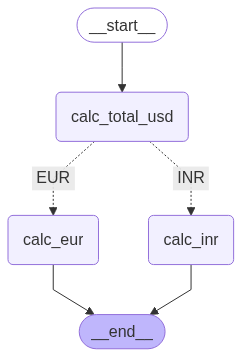

In [31]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
graph.invoke({"amt_usd":1000,"target_currency":"EUR"})

{'amt_usd': 1000.0,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 980.0}